In [41]:
# Step 3 - Exploring Data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("IMDb_rating_data_without_nan.csv",index_col = 0)
data.head()

,Name,Genre,ID,Year,Imdb Rating,Director,Votes,Gross,malesRating,malesCount,femalesRating,femalesCount
0,The Dark Knight,Action,tt0468569,2008,9.0,Christopher Nolan,"2,556,384",534.86,9.0,"1,476,807",8.7,"264,598"
1,The Lord of the Rings: The Return of the King,Action,tt0167260,2003,9.0,Peter Jackson,"1,777,166",377.85,9.0,"1,027,904",8.9,"218,150"
2,K.G.F: Chapter 2,Action,tt10698680,2022,8.9,Prashanth Neel,"93,320",92.52,8.3,"13,286",7.5,428
3,Everything Everywhere All at Once,Action,tt6710474,2022,8.8,Dan Kwan,"39,711",92.52,8.7,"17,826",8.7,"3,781"
4,Inception,Action,tt1375666,2010,8.8,Christopher Nolan,"2,269,287",292.58,8.8,"1,260,681",8.7,"293,467"


Text(0, 0.5, 'Frequency')

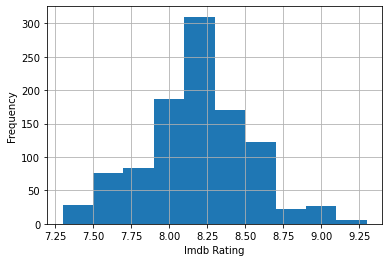

In [3]:
data['Imdb Rating'].hist(bins=10)
plt.xlabel('Imdb Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

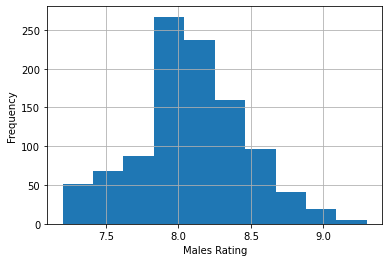

In [4]:
data['malesRating'].hist(bins=10)
plt.xlabel('Males Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

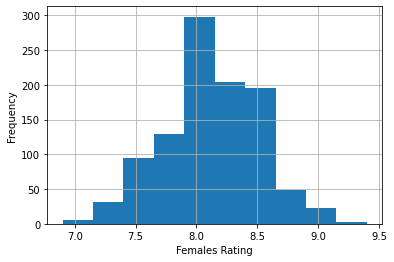

In [5]:
data['femalesRating'].hist(bins=10)
plt.xlabel('Females Rating')
plt.ylabel('Frequency')

In [12]:
## ---------------------------------------------
def plot_frequent_elements(df, df_in_params):
    fig, axes = plt.subplots(1, 2, figsize=(20,5))
    for i, row in df_in_params.iterrows():
        series = get_frequent_elements(df, row.loc['col_name'], row.loc['num_top_elements'])
        one_dim_plot(series, row.loc['plot_type'], axes[i])
## ---------------------------------------------        
def get_frequent_elements(df, col_name, num_top_elements):
    temp_df = df.copy()
    series = temp_df[col_name].value_counts()[:num_top_elements].sort_index(ascending=True)
    return series
## ---------------------------------------------
def one_dim_plot(sr, plot_type, axis):
    sr.plot(kind=plot_type,ax=axis)
## ---------------------------------------------

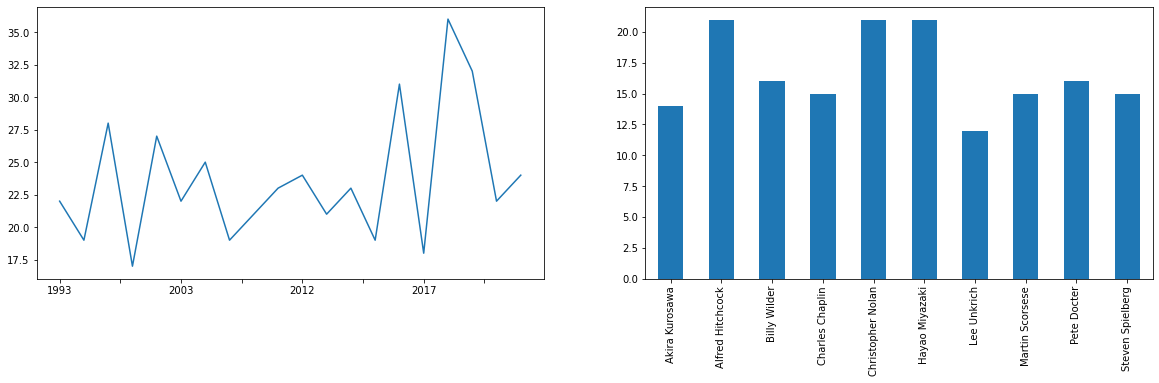

In [13]:
df_params = pd.DataFrame({'plot_type': ['line', 'bar'], 
                          'col_name': ['Year', 'Director'],
                          'num_top_elements': [20,10]})
plot_frequent_elements(data, df_params)

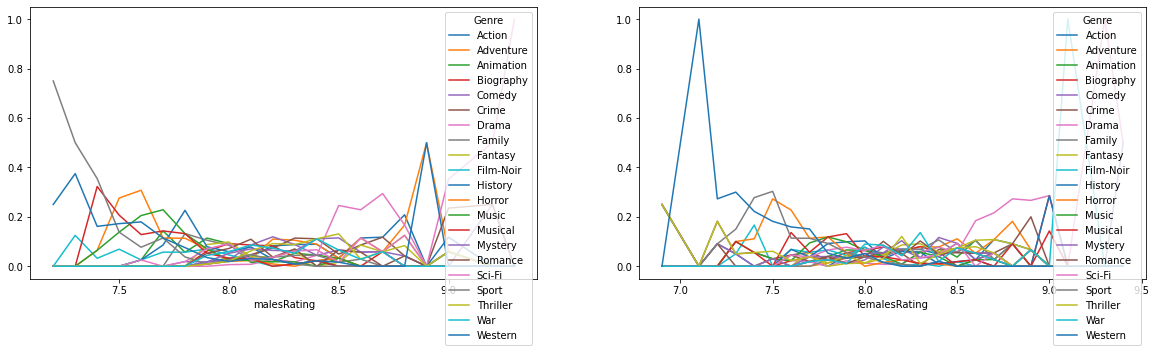

In [36]:
## ---------------------------------------------
def plot_cross_tabulation(df, col_names, other_col_name):
    fig, axes = plt.subplots(1, len(col_names), figsize=(20,5))
    i = 0
    for col in col_names:
        crossed_df = cross_tabulation(df, col, other_col_name)
        one_dim_plot(crossed_df, 'line', axes[i])
        i = i + 1
## ---------------------------------------------
def cross_tabulation(df, col_name, other_col_name):
    return pd.crosstab(df[col_name], df[other_col_name], normalize='index')
## ---------------------------------------------
plot_cross_tabulation(data, ['malesRating','femalesRating'], 'Genre')

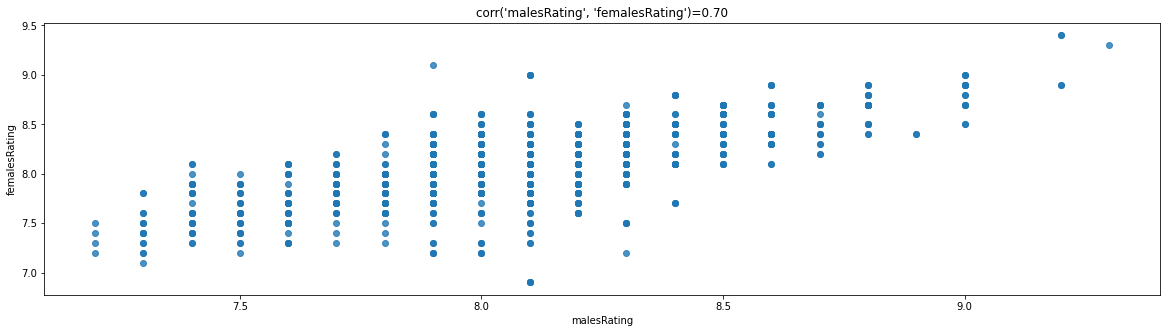

In [50]:
## ---------------------------------------------
def plot_high_correlated_scatters(df):
    correlations, tuple_arr = get_highly_correlated_cols(df)
    fig, ax = plt.subplots(1, len(correlations), figsize=(20,5))

    indx_sort = np.argsort(correlations)
    for i, n_correlation in enumerate(indx_sort): 
        col_lt, col_rt = tuple_arr[n_correlation]
        col_lt_name = df.columns[tuple_arr[i][0]]
        col_rt_name = df.columns[tuple_arr[i][1]]
        title = "corr('%s', '%s')=%4.2f" %(col_lt_name, col_rt_name, correlations[n_correlation])
        sns.regplot(x=df.columns[tuple_arr[i][0]], y=df.columns[tuple_arr[i][1]], data=df, fit_reg=False).set_title(title)
## ---------------------------------------------
def get_highly_correlated_cols(df):
    correlatedColumns = []
    corr = df.corr(method='pearson')
    indices = corr.index
    columns = corr.columns
    posthreshold = 0.5
        
    for cInd, c in enumerate(columns):
        for rInd, r in enumerate(indices):
            if (c != r) and (corr[c][r] > posthreshold) and (not is_in_array(correlatedColumns, cInd, rInd)):
                correlatedColumns.append({"column" : cInd , "row" : rInd , "val" :corr[c][r] })

    correlations = []
    tuple_arr = []
    for item in correlatedColumns:
        correlations.append(item["val"])
        my_tuple = item["column"], item["row"]
        tuple_arr.append(my_tuple)
    return correlations, tuple_arr
## ---------------------------------------------
def is_in_array(correlatedColumns, c, r):
    for item in correlatedColumns:
        if (item["column"] == c and item["row"] == r) or (item["row"] == r and item["column"] == c) or (item["column"] == r and item["row"] == c) or (item["row"] == c and item["column"] == r):
            return True
    return False
## ---------------------------------------------
cols_for_correlations = ['malesRating', 'femalesRating',]
plot_high_correlated_scatters(data[cols_for_correlations])